In [24]:
from shapely.geometry import Point, Polygon
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

pd.set_option('display.max_colwidth',1)
# pd.set_option('display.max_columns', None)

%run ../python_files/feature_selection_blocks

sns.set_context('talk')
sns.set_palette(sns.diverging_palette(10, 220, sep=80, n=8))

In [2]:
# import data
puds = pd.read_csv('../data/final_datasets/master_puds_blocks.csv')

In [3]:
# feature engineering
puds = create_demo_col(puds)
minipuds = agg_puds(puds)

In [29]:
puds.shape

(599, 59)

In [27]:
puds[['GEOID', 'year', 'name', 'population', 'poverty-rate',
       'renter-occupied-households', 'pct-renter-occupied',
       'median-gross-rent', 'median-household-income', 'median-property-value',
       'rent-burden', 'pct-white', 'pct-af-am', 'pct-hispanic', 'pct-am-ind',
       'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other', 'pct-non-white',
       'eviction-filings', 'evictions', 'eviction-rate',
       'eviction-filing-rate', 'low-flag', 'imputed', 'subbed', 'ward',
       'PUD_NAME', 'PUD_WEB_URL', 'PUD_CHANGE_NARRATIVE', 'PUD_ZONING',
       'PUD_STATUS', 'PUD_CASE_NUMBER', 'GLOBALID', 'WARD',
       'Zone_Cat', 'ADDRESS', 'PROJECT_NAME', 'STATUS_PUBLIC',
       'AGENCY_CALCULATED', 'AFFORDABLE_UNITS_AT_0_30_AMI',
       'AFFORDABLE_UNITS_AT_31_50_AMI', 'AFFORDABLE_UNITS_AT_51_60_AMI',
       'AFFORDABLE_UNITS_AT_61_80_AMI', 'AFFORDABLE_UNITS_AT_81_AMI',
       'TOTAL_AFFORDABLE_UNITS', 'MAR_WARD', 'Type', 'ANC',
       'Total # Residential Units', '% Affordable Units',
       'Total # of 3 bedroom+ units (Fam sized units)',
       'Ownership (rental vs. condo or mix)',
       'Affordability notes (What levels of AMI% are avail)', 'FULLADDRESS',
       'GIS_LAST_MOD_DTTM', 'CASE_ID_update']].head(10)

,GEOID,year,name,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other,pct-non-white,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed,ward,PUD_NAME,PUD_WEB_URL,PUD_CHANGE_NARRATIVE,PUD_ZONING,PUD_STATUS,PUD_CASE_NUMBER,GLOBALID,WARD,Zone_Cat,ADDRESS,PROJECT_NAME,STATUS_PUBLIC,AGENCY_CALCULATED,AFFORDABLE_UNITS_AT_0_30_AMI,AFFORDABLE_UNITS_AT_31_50_AMI,AFFORDABLE_UNITS_AT_51_60_AMI,AFFORDABLE_UNITS_AT_61_80_AMI,AFFORDABLE_UNITS_AT_81_AMI,TOTAL_AFFORDABLE_UNITS,MAR_WARD,Type,ANC,Total # Residential Units,% Affordable Units,Total # of 3 bedroom+ units (Fam sized units),Ownership (rental vs. condo or mix),Affordability notes (What levels of AMI% are avail),FULLADDRESS,GIS_LAST_MOD_DTTM,CASE_ID_update
0,110010001001,2016,1.1,1431.0,0.0,377.0,53.29,2568.0,141792.0,1133500.0,22.1,85.67,1.47,10.76,0.00,2.10,0.0,0.00,0.00,14.33,7.0,2.0,0.53,1.86,1,0,0,Ward 2,"Cathedral Commons Partners, LLC",https://app.dcoz.dc.gov/Content/Search/ViewCaseReport.aspx?case_id=08-15A,Modification 9/26/16,C-2-A,Final,08-15A,{CBE9203F-D56A-4A05-A719-DF2B1A81BFBB},Ward 3,Commercial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,110010001002,2016,1.2,1367.0,0.0,548.0,53.75,1846.0,124808.0,796900.0,21.2,84.64,3.29,4.97,0.00,3.51,0.0,1.61,1.98,15.36,9.0,0.0,0.00,1.64,1,0,0,Ward 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,110010001003,2016,1.3,1209.0,0.0,195.0,28.04,3018.0,237604.0,1994200.0,10.8,78.49,0.00,10.67,0.99,8.52,0.0,1.32,0.00,21.50,1.0,1.0,0.51,0.51,1,0,0,Ward 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,110010001004,2016,1.4,1202.0,0.0,260.0,34.21,3200.0,240045.0,1594700.0,21.4,77.54,0.00,16.22,0.00,6.24,0.0,0.00,0.00,22.46,2.0,1.0,0.38,0.77,1,0,0,Ward 2,"Four Points, LLC & Curtis Properties",https://app.dcoz.dc.gov/Content/Search/ViewCaseReport.aspx?case_id=08-07D,Second Stage PUD. 3/30/15,C-3-C,Final,08-07D,{0EB5479A-1921-4D2F-864C-5D6D22C5A9D9},Ward 8,Commercial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,110010002011,2016,2.01.1,3685.0,0.0,1.0,0.00,NaN,NaN,NaN,NaN,65.51,7.41,9.06,0.00,13.43,0.0,4.34,0.24,34.48,1.0,0.0,0.00,100.00,1,0,0,Ward 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,110010002021,2016,2.02.1,1208.0,0.0,217.0,34.01,2158.0,192750.0,1330700.0,25.1,84.93,3.64,6.79,0.00,3.89,0.0,0.75,0.00,15.07,3.0,0.0,0.00,1.38,1,0,0,Ward 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,110010002022,2016,2.02.2,752.0,4.5,139.0,19.94,1675.0,188846.0,1163500.0,22.8,97.74,0.00,0.00,0.00,1.46,0.0,0.80,0.00,2.26,1.0,0.0,0.00,0.72,1,0,0,Ward 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,110010002023,2016,2.02.3,887.0,0.0,299.0,44.44,2455.0,109583.0,1419600.0,50.0,84.55,6.09,6.43,0.00,1.80,0.0,1.13,0.00,15.45,8.0,0.0,0.00,2.68,1,0,0,Ward 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,110010002024,2016,2.02.4,1970.0,0.0,342.0,40.54,2369.0,101250.0,648200.0,50.0,67.56,13.20,7.36,0.41,6.45,0.0,5.03,0.00,32.45,2.0,0.0,0.00,0.58,1,0,0,Ward 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,110010003001,2016,3.1,1174.0,0.0,248.0,51.96,2273.0,127778.0,650300.0,26.0,93.27,0.00,5.37,0.00,1.36,0.0,0.00,0.00,6.73,2.0,0.0,0.00,0.81,1,0,0,Ward 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

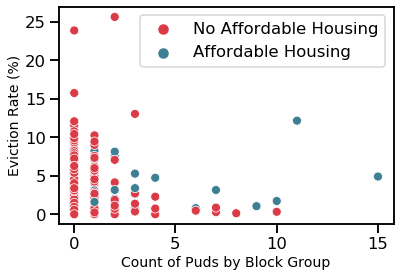

In [4]:
sns.set_palette



In [5]:
# set up dependent var
outcome = 'eviction-rate'

In [6]:
# can PUD features be used as a predictor for eviction rate?

# set up multiple linear regression
x_cols = ['pud_count','% Affordable Units']

X = minipuds[x_cols].values

y = minipuds[outcome]

# fit model
X = sm.add_constant(X)
model = sm.OLS(y, X, hasconst=True )
result = model.fit()
labels = ['intercept'] + x_cols
result.summary(xname=labels)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          eviction-rate   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.3449
Date:                Tue, 03 Dec 2019   Prob (F-statistic):              0.709
Time:                        09:19:16   Log-Likelihood:                -958.66
No. Observations:                 367   AIC:                             1923.
Df Residuals:                     364   BIC:                             1935.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept              2.4607      0.187     13.160      0.000       2.093       2.828
pud_count              0.0771      0.112      0.689      0.491      -0.143       0.297
% Affordable Units     0.3548      2.549      0.139      0.889      -4.658       5.368
==============================================================================
Omnibus:                      239.010   Durbin-Watson:                   1.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2384.888
Skew:                           2.662   Prob(JB):                         0.00
Kurtosis:                      14.297   Cond. No.                         27.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on Adj. R-squared of -0.004, PUD features do **not** explain any of the variance in eviction-rate

In [14]:
minipuds['pud_count'].nunique()

12

In [13]:
minipuds['pud_count'].value_counts()

0     254
1     63 
2     24 
3     11 
4     4  
7     3  
10    2  
6     2  
15    1  
11    1  
9     1  
8     1  
Name: pud_count, dtype: int64

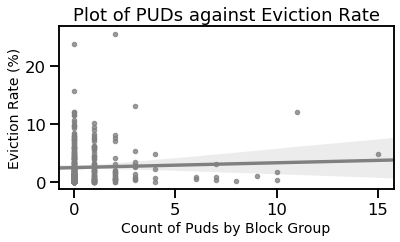

In [7]:
fig = plt.figure(figsize=(6,3))
ax = sns.regplot(x='pud_count', y=outcome, data=minipuds, color='gray', marker='.');
plt.title('Plot of PUDs against Eviction Rate');
ax.set_xlabel('Count of Puds by Block Group', size=14);
ax.set_ylabel('Eviction Rate (%)', size=14);
plt.show();

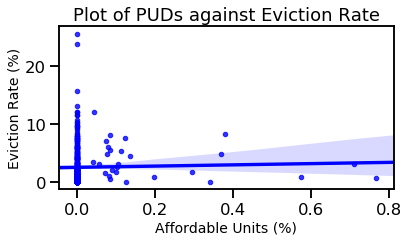

In [17]:
fig = plt.figure(figsize=(6,3))
ax =sns.regplot(x='% Affordable Units', y=outcome, data=minipuds, color='blue', marker='.');
plt.title('Plot of PUDs against Eviction Rate');
ax.set_xlabel('Affordable Units (%)', size=14);
ax.set_ylabel('Eviction Rate (%)', size=14);
plt.show();

In [11]:
# Attempt at multilinearity plot:
# fig = plt.figure(figsize=(6,3))
# ax = sns.regplot(x='pud_count', y=outcome, data=minipuds, color='gray', marker='.');
# sns.regplot(x='% Affordable Units', y=outcome, data=minipuds, color='blue', marker='.');
# plt.title('Plot of PUDs against Eviction Rate');
# ax.set_xlabel('Count of Puds by Block Group', size=14);
# ax.set_ylabel('Eviction Rate (%)', size=14);
# plt.show();

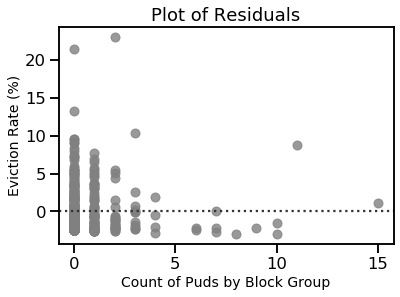

In [8]:
ax = sns.residplot(x='pud_count', y=outcome, data=minipuds, color='gray');
plt.title('Plot of Residuals');
ax.set_xlabel('Count of Puds by Block Group', size=14);
ax.set_ylabel('Eviction Rate (%)', size=14);
plt.show();